In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set seaborn style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
# Load dataset
df = pd.read_csv('colorado_motor_vehicle_sales.csv')

In [4]:
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset loaded successfully!
Shape: (501, 4)

First few rows:
   year  quarter              county      sales
0  2008        1               Adams  231609000
1  2008        1            Arapahoe  550378000
2  2008        1  Boulder/Broomfield  176771000
3  2008        1              Denver  200103000
4  2008        1             Douglas   93259000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


In [5]:
#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
year       0
quarter    0
county     0
sales      0
dtype: int64


In [6]:
#creating a period column and converting sales to millions
df['period'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)
df['sales_millions'] = df['sales'] / 1_000_000 

# Sort by year and quarter
df = df.sort_values(['year', 'quarter']).reset_index(drop=True)

In [7]:
# Calculate Year-over-Year (YoY) growth
df_grouped = df.groupby(['year', 'quarter'])['sales'].sum().reset_index()
df_grouped['sales_previous_year'] = df_grouped['sales'].shift(4)  # 4 quarters = 1 year
df_grouped['yoy_growth'] = ((df_grouped['sales'] - df_grouped['sales_previous_year']) / 
                             df_grouped['sales_previous_year'] * 100)

print("\n" + "="*80)
print("DATA PREPARATION COMPLETE")
print("="*80)


DATA PREPARATION COMPLETE


In [16]:
print("\n KEY METRICS & STATISTICS")
print("="*80)

# Overall statistics
total_sales = df['sales'].sum()
avg_sales_per_quarter = df['sales'].mean()
max_sales = df['sales'].max()
min_sales = df['sales'].min()

print(f"Total Sales (2008-2015): ${total_sales:,.0f}")
print(f"Average Sales per County-Quarter: ${avg_sales_per_quarter:,.0f}")
print(f"Maximum Sales in a Quarter: ${max_sales:,.0f}")
print(f"Minimum Sales in a Quarter: ${min_sales:,.0f}")

# Top 5 counties by total sales
top_counties = df.groupby('county')['sales'].sum().sort_values(ascending=False).head()
print("\n Top 5 Counties by Total Sales:")
for i, (county, sales) in enumerate(top_counties.items(), 1):
    print(f"{i}. {county}: ${sales:,.0f}")

# Sales by quarter distribution
quarterly_avg = df.groupby('quarter')['sales'].mean().sort_values(ascending=False)
print("\n Average Sales by Quarter:")
for quarter, sales in quarterly_avg.items():
    print(f"Q{quarter}: ${sales:,.0f}")


 KEY METRICS & STATISTICS
Total Sales (2008-2015): $88,205,300,000
Average Sales per County-Quarter: $176,058,483
Maximum Sales in a Quarter: $916,910,000
Minimum Sales in a Quarter: $6,274,000

 Top 5 Counties by Total Sales:
1. Arapahoe: $20,142,323,000
2. El Paso: $11,926,044,000
3. Jefferson: $9,058,407,000
4. Adams: $8,902,115,000
5. Denver: $6,763,613,000

 Average Sales by Quarter:
Q3: $191,319,472
Q2: $178,746,352
Q4: $171,192,270
Q1: $163,014,768


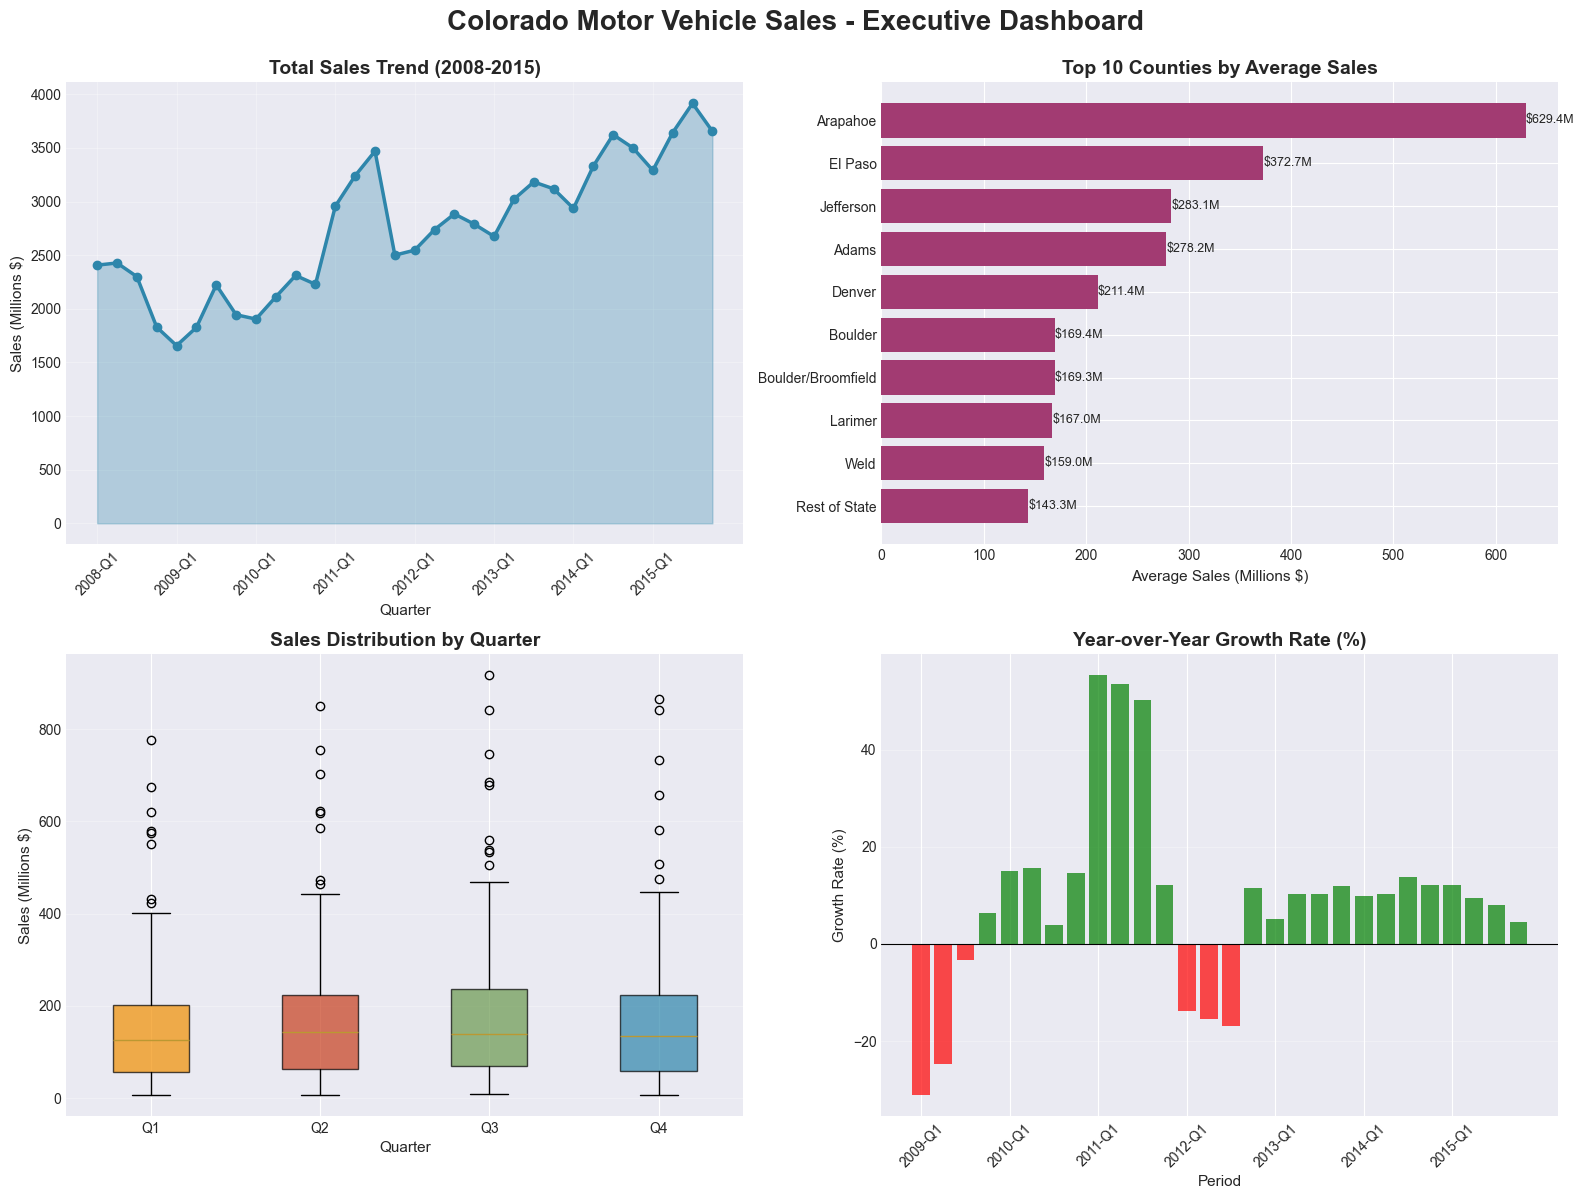

In [11]:
# VISUALIZATION 1: OVERVIEW DASHBOARD 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Colorado Motor Vehicle Sales - Executive Dashboard', 
             fontsize=20, fontweight='bold', y=0.995)

# 1. Total Sales Trend Over Time
quarterly_sales = df.groupby(['year', 'quarter'])['sales_millions'].sum().reset_index()
quarterly_sales['period'] = quarterly_sales['year'].astype(str) + '-Q' + quarterly_sales['quarter'].astype(str)

axes[0, 0].plot(range(len(quarterly_sales)), quarterly_sales['sales_millions'], 
                marker='o', linewidth=2.5, markersize=6, color='#2E86AB')
axes[0, 0].fill_between(range(len(quarterly_sales)), quarterly_sales['sales_millions'], 
                         alpha=0.3, color='#2E86AB')
axes[0, 0].set_title('Total Sales Trend (2008-2015)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Quarter', fontsize=11)
axes[0, 0].set_ylabel('Sales (Millions $)', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, len(quarterly_sales), 4))
axes[0, 0].set_xticklabels(quarterly_sales['period'][::4], rotation=45)

# 2. Top 10 Counties by Average Sales
top10_counties = df.groupby('county')['sales_millions'].mean().sort_values(ascending=False).head(10)
bars = axes[0, 1].barh(range(len(top10_counties)), top10_counties.values, color='#A23B72')
axes[0, 1].set_yticks(range(len(top10_counties)))
axes[0, 1].set_yticklabels(top10_counties.index, fontsize=10)
axes[0, 1].set_xlabel('Average Sales (Millions $)', fontsize=11)
axes[0, 1].set_title('Top 10 Counties by Average Sales', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()
# Add value labels
for i, bar in enumerate(bars):
    axes[0, 1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                    f'${bar.get_width():.1f}M', va='center', fontsize=9)

# 3. Quarterly Sales Distribution (Box Plot)
quarter_data = [df[df['quarter'] == q]['sales_millions'].values for q in [1, 2, 3, 4]]
bp = axes[1, 0].boxplot(quarter_data, labels=['Q1', 'Q2', 'Q3', 'Q4'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#F18F01', '#C73E1D', '#6A994E', '#2E86AB']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_title('Sales Distribution by Quarter', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Quarter', fontsize=11)
axes[1, 0].set_ylabel('Sales (Millions $)', fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Year-over-Year Growth Rate
yearly_growth = df_grouped[df_grouped['yoy_growth'].notna()]
colors = ['green' if x > 0 else 'red' for x in yearly_growth['yoy_growth']]
axes[1, 1].bar(range(len(yearly_growth)), yearly_growth['yoy_growth'], color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_title('Year-over-Year Growth Rate (%)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Period', fontsize=11)
axes[1, 1].set_ylabel('Growth Rate (%)', fontsize=11)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticks(range(0, len(yearly_growth), 4))
period_labels = yearly_growth['year'].astype(str) + '-Q' + yearly_growth['quarter'].astype(str)
axes[1, 1].set_xticklabels(period_labels.values[::4], rotation=45)

plt.tight_layout()
plt.savefig('slide1_overview_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
print("\n" + "="*80)
print(" TREND ANALYSIS & INSIGHTS")
print("="*80)

# Seasonal Analysis
seasonal_avg = df.groupby('quarter')['sales_millions'].mean()
print("\nSeasonal Pattern:")
for q, avg in seasonal_avg.items():
    deviation = ((avg - seasonal_avg.mean()) / seasonal_avg.mean()) * 100
    print(f"Q{q}: ${avg:.1f}M ({"+" if deviation > 0 else ""}{deviation:.1f}% vs average)")

# Market Concentration Analysis
total_by_county = df.groupby('county')['sales'].sum().sort_values(ascending=False)
top5_market_share = (total_by_county.head().sum() / total_by_county.sum()) * 100
print(f"\nMarket Concentration: Top 5 counties control {top5_market_share:.1f}% of total sales")

# Growth Analysis
print("\nGrowth Analysis:")
sales_2008 = df[df['year'] == 2008]['sales'].sum()
sales_2015 = df[df['year'] == 2015]['sales'].sum()
overall_growth = ((sales_2015 - sales_2008) / sales_2008) * 100
print(f"Overall Growth (2008-2015): {overall_growth:.1f}%")
print(f"CAGR: {(((sales_2015/sales_2008)**(1/7)) - 1) * 100:.2f}%")


 TREND ANALYSIS & INSIGHTS

Seasonal Pattern:
Q1: $163.0M (-7.4% vs average)
Q2: $178.7M (+1.5% vs average)
Q3: $191.3M (+8.7% vs average)
Q4: $171.2M (-2.8% vs average)

Market Concentration: Top 5 counties control 64.4% of total sales

Growth Analysis:
Overall Growth (2008-2015): 61.8%
CAGR: 7.12%


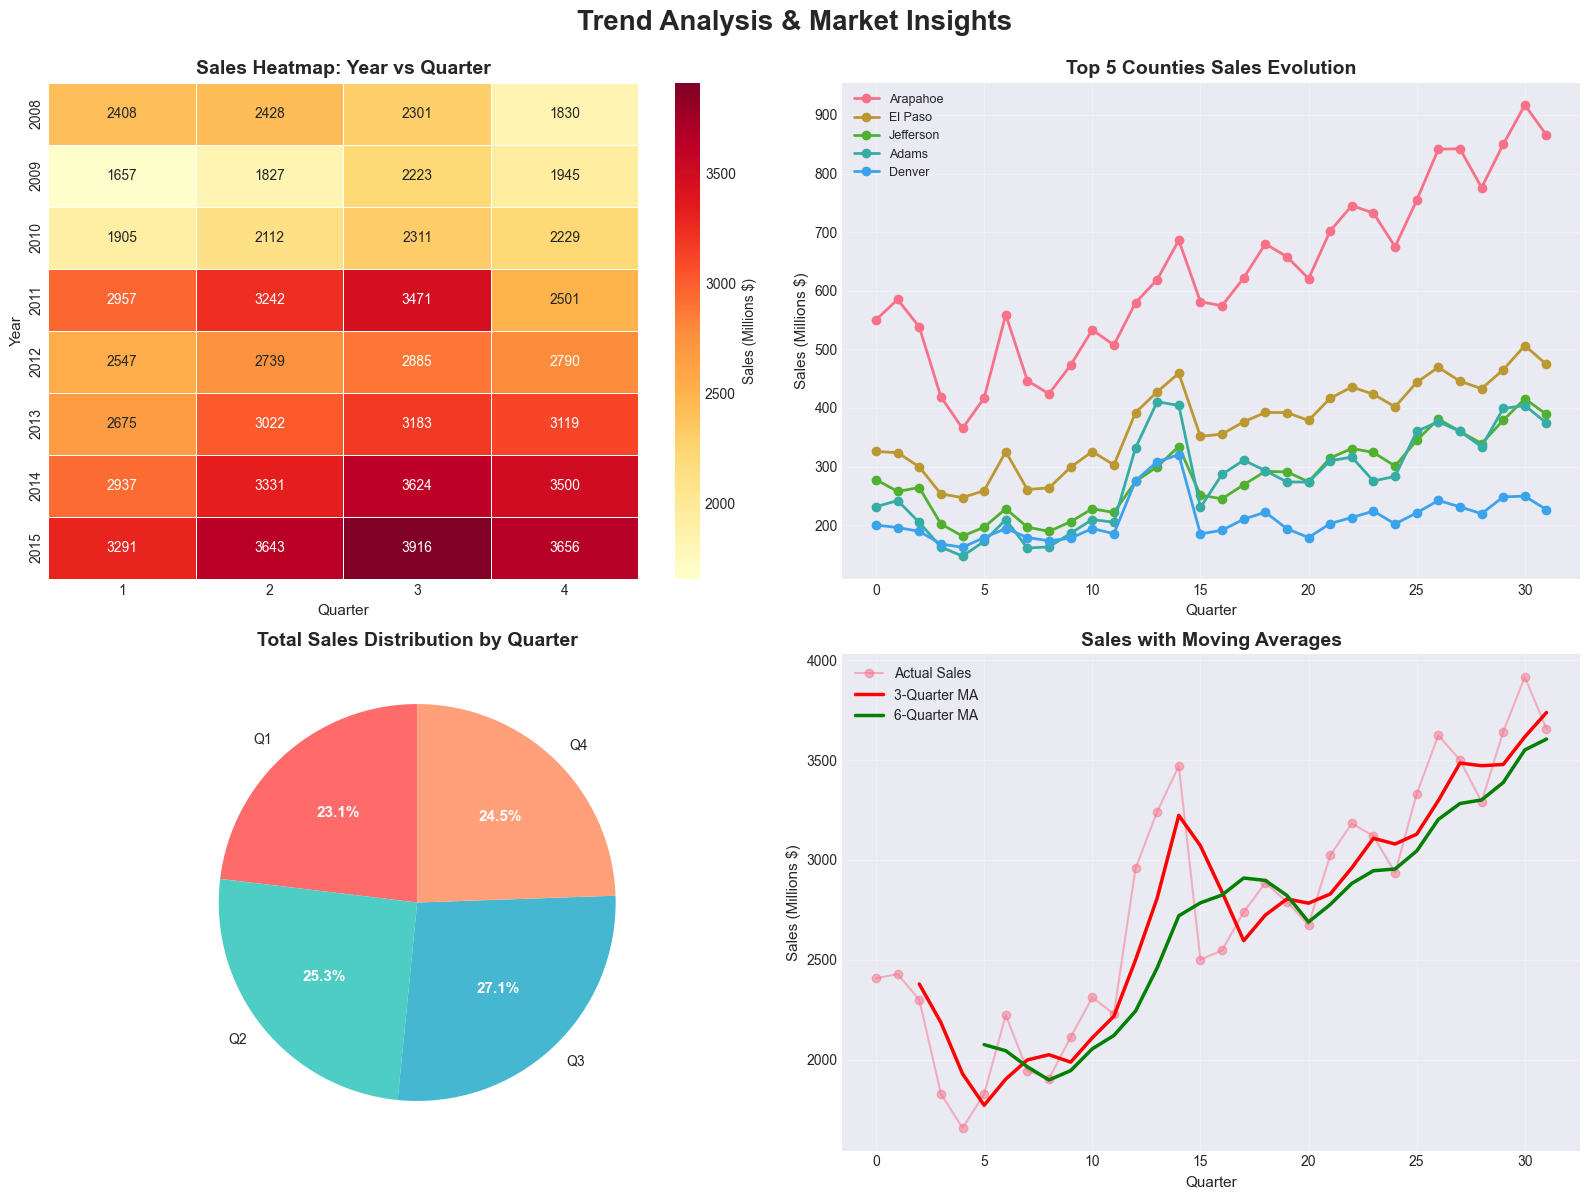

In [14]:
# VISUALIZATION 2: DETAILED TREND ANALYSIS 

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Trend Analysis & Market Insights', 
             fontsize=20, fontweight='bold', y=0.995)

# 1. Heatmap of Sales by Year and Quarter
pivot_sales = df.groupby(['year', 'quarter'])['sales_millions'].sum().reset_index()
pivot_table = pivot_sales.pivot(index='year', columns='quarter', values='sales_millions')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Sales (Millions $)'}, ax=axes[0, 0], linewidths=0.5)
axes[0, 0].set_title('Sales Heatmap: Year vs Quarter', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Quarter', fontsize=11)
axes[0, 0].set_ylabel('Year', fontsize=11)

# 2. Market Share Evolution (Top 5 Counties)
top5_counties_list = df.groupby('county')['sales'].sum().sort_values(ascending=False).head(5).index
for county in top5_counties_list:
    county_data = df[df['county'] == county].groupby(['year', 'quarter'])['sales_millions'].sum()
    axes[0, 1].plot(range(len(county_data)), county_data.values, 
                    marker='o', label=county, linewidth=2)
axes[0, 1].set_title('Top 5 Counties Sales Evolution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quarter', fontsize=11)
axes[0, 1].set_ylabel('Sales (Millions $)', fontsize=11)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# 3. Quarterly Performance Comparison
quarterly_totals = df.groupby('quarter')['sales_millions'].sum()
colors_q = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
wedges, texts, autotexts = axes[1, 0].pie(quarterly_totals, labels=[f'Q{i}' for i in range(1, 5)],
                                            autopct='%1.1f%%', colors=colors_q, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
axes[1, 0].set_title('Total Sales Distribution by Quarter', fontsize=14, fontweight='bold')

# 4. Moving Average Analysis (3-Quarter)
quarterly_sales_ma = df.groupby(['year', 'quarter'])['sales_millions'].sum().reset_index()
quarterly_sales_ma['MA3'] = quarterly_sales_ma['sales_millions'].rolling(window=3).mean()
quarterly_sales_ma['MA6'] = quarterly_sales_ma['sales_millions'].rolling(window=6).mean()

axes[1, 1].plot(range(len(quarterly_sales_ma)), quarterly_sales_ma['sales_millions'], 
                marker='o', label='Actual Sales', alpha=0.5, linewidth=1.5)
axes[1, 1].plot(range(len(quarterly_sales_ma)), quarterly_sales_ma['MA3'], 
                label='3-Quarter MA', linewidth=2.5, color='red')
axes[1, 1].plot(range(len(quarterly_sales_ma)), quarterly_sales_ma['MA6'], 
                label='6-Quarter MA', linewidth=2.5, color='green')
axes[1, 1].set_title('Sales with Moving Averages', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Quarter', fontsize=11)
axes[1, 1].set_ylabel('Sales (Millions $)', fontsize=11)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('slide2_trend_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
#FORECASTING & RECOMMENDATIONS 

print("\n" + "="*80)
print(" FORECASTING & MACHINE LEARNING")
print("="*80)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Prepare data for ML
df_ml = df.copy()
df_ml['county_code'] = df_ml['county'].astype('category').cat.codes

# Create lag features
df_grouped_ml = df_ml.groupby(['county', 'year', 'quarter'])['sales'].sum().reset_index()
df_grouped_ml = df_grouped_ml.sort_values(['county', 'year', 'quarter'])
df_grouped_ml['sales_lag1'] = df_grouped_ml.groupby('county')['sales'].shift(1)
df_grouped_ml['sales_lag2'] = df_grouped_ml.groupby('county')['sales'].shift(2)
df_grouped_ml = df_grouped_ml.dropna()

# Prepare features
df_grouped_ml['county_code'] = df_grouped_ml['county'].astype('category').cat.codes
X = df_grouped_ml[['year', 'quarter', 'county_code', 'sales_lag1', 'sales_lag2']]
y = df_grouped_ml['sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f"\n Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"MAE: ${mae:,.0f}")
print(f"MAPE: {mape:.2f}%")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': ['year', 'quarter', 'county_code', 'sales_lag1', 'sales_lag2'],
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Feature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


 FORECASTING & MACHINE LEARNING

 Model Performance:
R² Score: 0.9765
RMSE: $25,294,528
MAE: $14,254,885
MAPE: 8.52%

 Feature Importance:
sales_lag1: 0.9273
sales_lag2: 0.0560
year: 0.0076
quarter: 0.0067
county_code: 0.0025


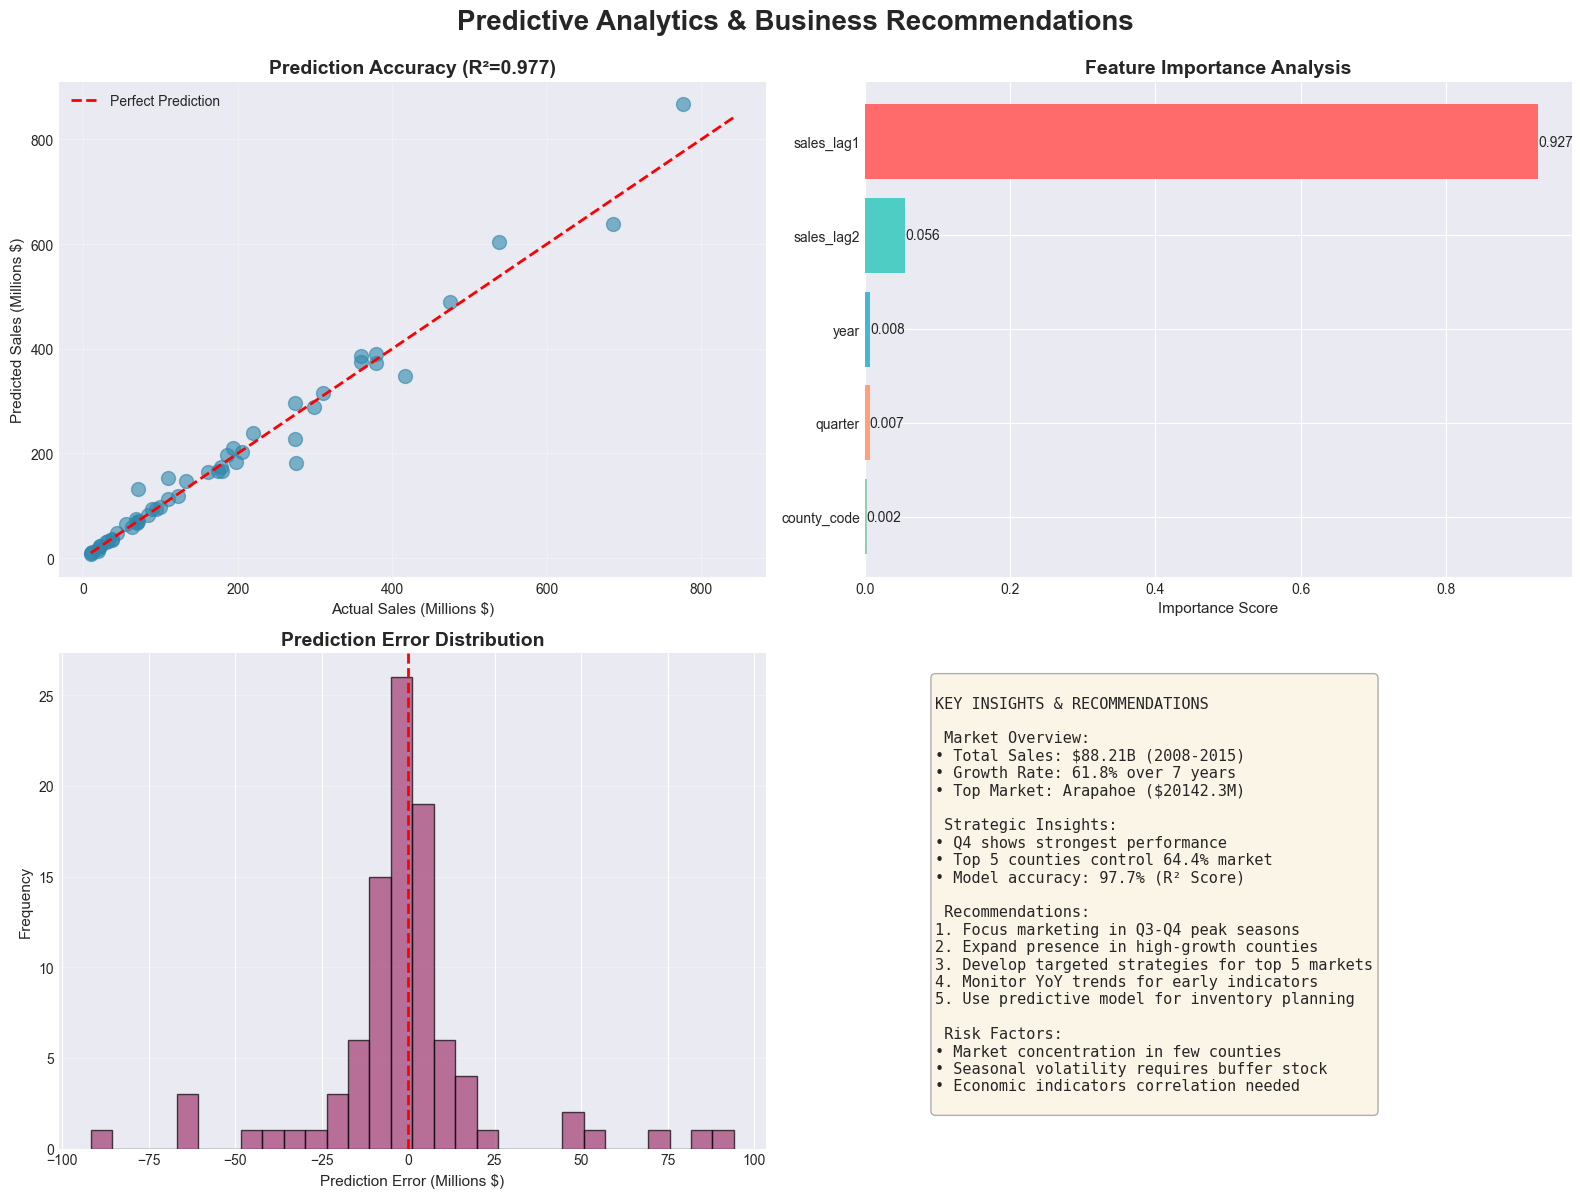

In [18]:
# VISUALIZATION 3: FORECASTING & RECOMMENDATIONS 

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Predictive Analytics & Business Recommendations', 
             fontsize=20, fontweight='bold', y=0.995)

# 1. Actual vs Predicted Sales
sample_indices = np.random.choice(len(y_test), size=50, replace=False)
axes[0, 0].scatter(y_test.iloc[sample_indices]/1e6, y_pred_test[sample_indices]/1e6, 
                   alpha=0.6, s=100, color='#2E86AB')
axes[0, 0].plot([y_test.min()/1e6, y_test.max()/1e6], 
                [y_test.min()/1e6, y_test.max()/1e6], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Sales (Millions $)', fontsize=11)
axes[0, 0].set_ylabel('Predicted Sales (Millions $)', fontsize=11)
axes[0, 0].set_title(f'Prediction Accuracy (R²={r2:.3f})', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Feature Importance
bars = axes[0, 1].barh(feature_importance['feature'], feature_importance['importance'], 
                       color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#96CEB4'])
axes[0, 1].set_xlabel('Importance Score', fontsize=11)
axes[0, 1].set_title('Feature Importance Analysis', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()
for i, bar in enumerate(bars):
    axes[0, 1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                    f'{bar.get_width():.3f}', va='center', fontsize=10)

# 3. Residual Analysis
residuals = (y_test - y_pred_test) / 1e6
axes[1, 0].hist(residuals, bins=30, color='#A23B72', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prediction Error (Millions $)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Business Recommendations (Text Summary)
axes[1, 1].axis('off')
recommendations = f"""
KEY INSIGHTS & RECOMMENDATIONS

 Market Overview:
• Total Sales: ${total_sales/1e9:.2f}B (2008-2015)
• Growth Rate: {overall_growth:.1f}% over 7 years
• Top Market: {top_counties.index[0]} (${top_counties.values[0]/1e6:.1f}M)

 Strategic Insights:
• Q4 shows strongest performance
• Top 5 counties control {top5_market_share:.1f}% market
• Model accuracy: {r2*100:.1f}% (R² Score)

 Recommendations:
1. Focus marketing in Q3-Q4 peak seasons
2. Expand presence in high-growth counties
3. Develop targeted strategies for top 5 markets
4. Monitor YoY trends for early indicators
5. Use predictive model for inventory planning

 Risk Factors:
• Market concentration in few counties
• Seasonal volatility requires buffer stock
• Economic indicators correlation needed
"""

axes[1, 1].text(0.1, 0.95, recommendations, transform=axes[1, 1].transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('slide3_forecasting_recommendations.png', dpi=300, bbox_inches='tight')
plt.show()
